# Content

<ul>
    <li> Dataframes </li>
    <li> Visual </li>
</ul>

## Indroduction

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import sys
sys.path.insert(1, '../../')
import prototype_nn as NN

This is used to check wether the neural network is producing the correct for our test data

## Dataframes

This is following is used to build the test dataframes

In [2]:
mu = 0.5

def van_der_pol(state, t):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x * x) * y - x
    return dxdt, dydt

def states(x, y, t):
    """
        states:
            This will be used to implement the model -van der pol using the odeint
            method. It then returns the states belonging to the system
        Args:
            x (int): This is the x value
            y (int): This is the y value
        Returns
            (<class 'numpy.ndarray'>) : This is the data of the model.
    """
    state_0 = [x, y]
    states = odeint(van_der_pol, state_0, t)
    return states
    
def dataframe(x, y, t, init_x, init_y):
    """
        dataframe:
            This will produce the dataframe of the van der pol model
            showing the x, y state values including the time variable,
            initial x and y state values
        Args:
            x (int):
                The x value state to start from
            y (int): 
                The y value state to start from
            init_x (int) :
                The initial x state value
            init_y (int):
                The initial y state value
        Return:
            (<class 'pandas.core.frame.DataFrame'>): The dataframe of the model
    """
    state = states(x, y, t)
    data = {'time' : t, 'x' : state[:, 0], 'y' : state[:, 1]}
    df = pd.DataFrame(data=data)
    df['initial_x'] = init_x
    df['initial_y'] = init_y
    return df

This is the test data to go through to see if we can make predictions

In [84]:
t = np.arange(0,20.1,0.001)
test_df_0 = []
for x in range(5,7):
    for y in range(5,7):
        df = dataframe(x,y,t,x,y) # test for 5, 6
        test_df_0.append(df)

In [85]:
len(test_df_0)

4

In [5]:
test_df_0[0]

,time,x,y,initial_x,initial_y
0,0.000,5.000000,5.000000,5,5
1,0.001,5.004968,4.935324,5,5
2,0.002,5.009871,4.871296,5,5
3,0.003,5.014710,4.807911,5,5
4,0.004,5.019487,4.745167,5,5
...,...,...,...,...,...
20095,20.095,0.112961,-1.984845,5,5
20096,20.096,0.110975,-1.985937,5,5
20097,20.097,0.108989,-1.987028,5,5
20098,20.098,0.107001,-1.988118,5,5


In [6]:
test_df_0[1]

,time,x,y,initial_x,initial_y
0,0.000,5.000000,6.000000,5,6
1,0.001,5.005962,5.923369,5,6
2,0.002,5.011847,5.847473,5,6
3,0.003,5.017657,5.772311,5,6
4,0.004,5.023392,5.697881,5,6
...,...,...,...,...,...
20095,20.095,0.459591,-1.774100,5,6
20096,20.096,0.457816,-1.775260,5,6
20097,20.097,0.456040,-1.776419,5,6
20098,20.098,0.454263,-1.777579,5,6


In [7]:
test_df_0[2]

,time,x,y,initial_x,initial_y
0,0.000,6.000000,5.000000,6,5
1,0.001,6.004954,4.907238,6,5
2,0.002,6.009815,4.815939,6,5
3,0.003,6.014586,4.726087,6,5
4,0.004,6.019268,4.637663,6,5
...,...,...,...,...,...
20095,20.095,1.357433,1.870912,6,5
20096,20.096,1.359303,1.868764,6,5
20097,20.097,1.361171,1.866610,6,5
20098,20.098,1.363036,1.864450,6,5


In [8]:
test_df_0[3]

,time,x,y,initial_x,initial_y
0,0.000,6.000000,6.000000,6,6
1,0.001,6.005945,5.889857,6,6
2,0.002,6.011780,5.781417,6,6
3,0.003,6.017508,5.674660,6,6
4,0.004,6.023130,5.569568,6,6
...,...,...,...,...,...
20095,20.095,1.037567,2.132306,6,6
20096,20.096,1.039699,2.131183,6,6
20097,20.097,1.041830,2.130054,6,6
20098,20.098,1.043959,2.128918,6,6


Combine all the data together to get the overall results

In [9]:
test_df_0_combine = pd.concat(test_df_0)
test_df_0_combine

,time,x,y,initial_x,initial_y
0,0.000,5.000000,5.000000,5,5
1,0.001,5.004968,4.935324,5,5
2,0.002,5.009871,4.871296,5,5
3,0.003,5.014710,4.807911,5,5
4,0.004,5.019487,4.745167,5,5
...,...,...,...,...,...
20095,20.095,1.037567,2.132306,6,6
20096,20.096,1.039699,2.131183,6,6
20097,20.097,1.041830,2.130054,6,6
20098,20.098,1.043959,2.128918,6,6


In [10]:
test_df_0_combine['initial_x,initial_y'] = list(zip(test_df_0_combine.initial_x, test_df_0_combine.initial_y))
test_df_0_combine = test_df_0_combine.drop(columns=['initial_x','initial_y'])
test_df_0_combine

,time,x,y,"initial_x,initial_y"
0,0.000,5.000000,5.000000,"(5, 5)"
1,0.001,5.004968,4.935324,"(5, 5)"
2,0.002,5.009871,4.871296,"(5, 5)"
3,0.003,5.014710,4.807911,"(5, 5)"
4,0.004,5.019487,4.745167,"(5, 5)"
...,...,...,...,...
20095,20.095,1.037567,2.132306,"(6, 6)"
20096,20.096,1.039699,2.131183,"(6, 6)"
20097,20.097,1.041830,2.130054,"(6, 6)"
20098,20.098,1.043959,2.128918,"(6, 6)"


We want carry on from t = 199.9 of the van der pol model that is saved in the csv data files. This would be used later to see how accurate the neural network can predict future simulations

In [11]:
time = np.arange(20.0,30.0,0.001)
test_df = []
for init_x in range(1,5):
    df = pd.DataFrame(pd.read_csv("../../data/train/van.csv", usecols=[0,1,2,3,4]))
    for init_y in range(1,5):
        row = df[(df.initial_x == init_x) & (df.initial_y == init_y ) & (df.time == 20.099)]
        df_1 = dataframe(row.x.item(), row.y.item(),time, init_x, init_x)
    test_df.append(df_1)

This is the length of the test dataframe

In [12]:
len(test_df)

4

The following short data fragements is used to show what is within the data

In [13]:
test_df[0]

,time,x,y,initial_x,initial_y
0,20.000,1.775047,1.127684,1,1
1,20.001,1.776173,1.124696,1,1
2,20.002,1.777296,1.121708,1,1
3,20.003,1.778417,1.118720,1,1
4,20.004,1.779534,1.115732,1,1
...,...,...,...,...,...
9995,29.995,-2.002410,-0.017773,1,1
9996,29.996,-2.002427,-0.015745,1,1
9997,29.997,-2.002442,-0.013721,1,1
9998,29.998,-2.002454,-0.011699,1,1


In [14]:
test_df[1]

,time,x,y,initial_x,initial_y
0,20.000,1.726415,1.249551,2,2
1,20.001,1.727663,1.246587,2,2
2,20.002,1.728908,1.243621,2,2
3,20.003,1.730150,1.240655,2,2
4,20.004,1.731389,1.237688,2,2
...,...,...,...,...,...
9995,29.995,-1.999949,-0.103358,2,2
9996,29.996,-2.000052,-0.101205,2,2
9997,29.997,-2.000152,-0.099055,2,2
9998,29.998,-2.000250,-0.096907,2,2


In [15]:
test_df[2]

,time,x,y,initial_x,initial_y
0,20.000,0.464532,2.209863,3,3
1,20.001,0.466742,2.210263,3,3
2,20.002,0.468953,2.210658,3,3
3,20.003,0.471164,2.211050,3,3
4,20.004,0.473375,2.211436,3,3
...,...,...,...,...,...
9995,29.995,-1.367012,-1.858560,3,3
9996,29.996,-1.368869,-1.856382,3,3
9997,29.997,-1.370725,-1.854200,3,3
9998,29.998,-1.372578,-1.852011,3,3


In [16]:
test_df[3]

,time,x,y,initial_x,initial_y
0,20.000,-1.609549,0.927640,4,4
1,20.001,-1.608621,0.928512,4,4
2,20.002,-1.607692,0.929383,4,4
3,20.003,-1.606762,0.930254,4,4
4,20.004,-1.605831,0.931125,4,4
...,...,...,...,...,...
9995,29.995,1.138007,-1.302087,4,4
9996,29.996,1.136705,-1.303034,4,4
9997,29.997,1.135401,-1.303980,4,4
9998,29.998,1.134097,-1.304927,4,4


This will combine all the test dataframes togeth

In [17]:
test_df_combine = pd.concat(test_df)
test_df_combine 

,time,x,y,initial_x,initial_y
0,20.000,1.775047,1.127684,1,1
1,20.001,1.776173,1.124696,1,1
2,20.002,1.777296,1.121708,1,1
3,20.003,1.778417,1.118720,1,1
4,20.004,1.779534,1.115732,1,1
...,...,...,...,...,...
9995,29.995,1.138007,-1.302087,4,4
9996,29.996,1.136705,-1.303034,4,4
9997,29.997,1.135401,-1.303980,4,4
9998,29.998,1.134097,-1.304927,4,4


This will add a new column initial_x, initial_y as a tuple column, and drop the initial_x and initial_y columns. this will be used later for plotting the graphs

In [18]:
test_df_combine['initial_x,initial_y'] = list(zip(test_df_combine.initial_x, test_df_combine.initial_y))
test_df_combine = test_df_combine.drop(columns=['initial_x','initial_y'])
test_df_combine

,time,x,y,"initial_x,initial_y"
0,20.000,1.775047,1.127684,"(1, 1)"
1,20.001,1.776173,1.124696,"(1, 1)"
2,20.002,1.777296,1.121708,"(1, 1)"
3,20.003,1.778417,1.118720,"(1, 1)"
4,20.004,1.779534,1.115732,"(1, 1)"
...,...,...,...,...
9995,29.995,1.138007,-1.302087,"(4, 4)"
9996,29.996,1.136705,-1.303034,"(4, 4)"
9997,29.997,1.135401,-1.303980,"(4, 4)"
9998,29.998,1.134097,-1.304927,"(4, 4)"


we want to give this data to the neural network to predict.

In [19]:
def preds(num_inputs, num_classes, learning_rate, inputs):
    model_x = NN.prototype(num_inputs, num_classes, learning_rate)
    model_x.load_state_dict(NN.torch.load("../../data/state/van_der_pol/vans_x.pth"))
    preds_x = model_x(inputs).detach().numpy().flatten()
    
    model_y = NN.prototype(num_inputs, num_classes, learning_rate)
    model_y.load_state_dict(NN.torch.load("../../data/state/van_der_pol/vans_y.pth"))
    preds_y = model_y(inputs).detach().numpy().flatten()
    
    return preds_x, preds_y

This is following code will produce predictions made by the neural network from preds_test_df

In [20]:
def dataframe_predictions(test_df):
    preds_test_df = []
    for i in range(0, len(test_df)):
        preds_x, preds_y = preds(3, 1, 0.01, NN.torch.from_numpy( test_df[i][['time','initial_x','initial_y']].to_numpy(dtype='float32') ))
        df = test_df[i]
        df["x_preds"] = preds_x
        df["y_preds"] = preds_y
        preds_test_df.append(df)
    return preds_test_df

The next following code would be looking at the predictions which the neural network made

In [21]:
preds_test_df_0 = dataframe_predictions(test_df_0)

In [22]:
len(preds_test_df_0)

4

In [23]:
preds_test_df_0[0]

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,0.000,5.000000,5.000000,5,5,4.868477,4.275995
1,0.001,5.004968,4.935324,5,5,4.868022,4.265247
2,0.002,5.009871,4.871296,5,5,4.867568,4.254496
3,0.003,5.014710,4.807911,5,5,4.867109,4.243744
4,0.004,5.019487,4.745167,5,5,4.866657,4.232995
...,...,...,...,...,...,...,...
20095,20.095,0.112961,-1.984845,5,5,-0.444288,0.264146
20096,20.096,0.110975,-1.985937,5,5,-0.444807,0.265439
20097,20.097,0.108989,-1.987028,5,5,-0.445324,0.266730
20098,20.098,0.107001,-1.988118,5,5,-0.445840,0.268019


In [24]:
preds_test_df_0[1]

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,0.000,5.000000,6.000000,5,6,4.905478,4.270004
1,0.001,5.005962,5.923369,5,6,4.907386,4.257478
2,0.002,5.011847,5.847473,5,6,4.909296,4.244949
3,0.003,5.017657,5.772311,5,6,4.911207,4.232419
4,0.004,5.023392,5.697881,5,6,4.913114,4.219893
...,...,...,...,...,...,...,...
20095,20.095,0.459591,-1.774100,5,6,-0.215912,-0.111182
20096,20.096,0.457816,-1.775260,5,6,-0.216431,-0.109889
20097,20.097,0.456040,-1.776419,5,6,-0.216948,-0.108599
20098,20.098,0.454263,-1.777579,5,6,-0.217464,-0.107309


In [25]:
preds_test_df_0[2]

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,0.000,6.000000,5.000000,6,5,5.588833,5.627059
1,0.001,6.004954,4.907238,6,5,5.588377,5.616311
2,0.002,6.009815,4.815939,6,5,5.587921,5.605563
3,0.003,6.014586,4.726087,6,5,5.587467,5.594814
4,0.004,6.019268,4.637663,6,5,5.587011,5.584064
...,...,...,...,...,...,...,...
20095,20.095,1.357433,1.870912,6,5,-0.619340,-0.363974
20096,20.096,1.359303,1.868764,6,5,-0.620187,-0.361901
20097,20.097,1.361171,1.866610,6,5,-0.621029,-0.359834
20098,20.098,1.363036,1.864450,6,5,-0.621871,-0.357767


In [26]:
preds_test_df_0[3]

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,0.000,6.000000,6.000000,6,6,5.722291,5.473137
1,0.001,6.005945,5.889857,6,6,5.721838,5.462392
2,0.002,6.011780,5.781417,6,6,5.721381,5.451642
3,0.003,6.017508,5.674660,6,6,5.720923,5.440894
4,0.004,6.023130,5.569568,6,6,5.720469,5.430141
...,...,...,...,...,...,...,...
20095,20.095,1.037567,2.132306,6,6,-0.359083,-1.136971
20096,20.096,1.039699,2.131183,6,6,-0.359931,-1.133745
20097,20.097,1.041830,2.130054,6,6,-0.360772,-1.130528
20098,20.098,1.043959,2.128918,6,6,-0.361615,-1.127309


In [27]:
preds_test_df_0_combine = pd.concat(preds_test_df_0)
preds_test_df_0_combine

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,0.000,5.000000,5.000000,5,5,4.868477,4.275995
1,0.001,5.004968,4.935324,5,5,4.868022,4.265247
2,0.002,5.009871,4.871296,5,5,4.867568,4.254496
3,0.003,5.014710,4.807911,5,5,4.867109,4.243744
4,0.004,5.019487,4.745167,5,5,4.866657,4.232995
...,...,...,...,...,...,...,...
20095,20.095,1.037567,2.132306,6,6,-0.359083,-1.136971
20096,20.096,1.039699,2.131183,6,6,-0.359931,-1.133745
20097,20.097,1.041830,2.130054,6,6,-0.360772,-1.130528
20098,20.098,1.043959,2.128918,6,6,-0.361615,-1.127309


In [28]:
preds_test_df_0_combine['initial_x,initial_y'] = list(zip(preds_test_df_0_combine.initial_x, preds_test_df_0_combine.initial_y))
preds_test_df_0_combine = preds_test_df_0_combine.drop(columns=['initial_x','initial_y'])
preds_test_df_0_combine

,time,x,y,x_preds,y_preds,"initial_x,initial_y"
0,0.000,5.000000,5.000000,4.868477,4.275995,"(5, 5)"
1,0.001,5.004968,4.935324,4.868022,4.265247,"(5, 5)"
2,0.002,5.009871,4.871296,4.867568,4.254496,"(5, 5)"
3,0.003,5.014710,4.807911,4.867109,4.243744,"(5, 5)"
4,0.004,5.019487,4.745167,4.866657,4.232995,"(5, 5)"
...,...,...,...,...,...,...
20095,20.095,1.037567,2.132306,-0.359083,-1.136971,"(6, 6)"
20096,20.096,1.039699,2.131183,-0.359931,-1.133745,"(6, 6)"
20097,20.097,1.041830,2.130054,-0.360772,-1.130528,"(6, 6)"
20098,20.098,1.043959,2.128918,-0.361615,-1.127309,"(6, 6)"


In [29]:
preds_test_df = dataframe_predictions(test_df)

In [30]:
len(preds_test_df)

4

In [31]:
preds_test_df[0]

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,20.000,1.775047,1.127684,1,1,2.480901,-0.912804
1,20.001,1.776173,1.124696,1,1,2.482118,-0.914630
2,20.002,1.777296,1.121708,1,1,2.483336,-0.916463
3,20.003,1.778417,1.118720,1,1,2.484546,-0.918299
4,20.004,1.779534,1.115732,1,1,2.485761,-0.920127
...,...,...,...,...,...,...,...
9995,29.995,-2.002410,-0.017773,1,1,15.505174,-37.014511
9996,29.996,-2.002427,-0.015745,1,1,15.506488,-37.018192
9997,29.997,-2.002442,-0.013721,1,1,15.507795,-37.021877
9998,29.998,-2.002454,-0.011699,1,1,15.509108,-37.025536


In [32]:
preds_test_df[1]

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,20.000,1.726415,1.249551,2,2,3.020896,2.421638
1,20.001,1.727663,1.246587,2,2,3.022819,2.422196
2,20.002,1.728908,1.243621,2,2,3.024741,2.422755
3,20.003,1.730150,1.240655,2,2,3.026654,2.423311
4,20.004,1.731389,1.237688,2,2,3.028574,2.423870
...,...,...,...,...,...,...,...
9995,29.995,-1.999949,-0.103358,2,2,16.077248,4.409022
9996,29.996,-2.000052,-0.101205,2,2,16.078470,4.406826
9997,29.997,-2.000152,-0.099055,2,2,16.079691,4.404627
9998,29.998,-2.000250,-0.096907,2,2,16.080917,4.402438


In [33]:
preds_test_df[2]

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,20.000,0.464532,2.209863,3,3,0.929505,2.300085
1,20.001,0.466742,2.210263,3,3,0.930437,2.301053
2,20.002,0.468953,2.210658,3,3,0.931370,2.302022
3,20.003,0.471164,2.211050,3,3,0.932295,2.302985
4,20.004,0.473375,2.211436,3,3,0.933225,2.303952
...,...,...,...,...,...,...,...
9995,29.995,-1.367012,-1.858560,3,3,17.535624,8.150487
9996,29.996,-1.368869,-1.856382,3,3,17.536840,8.151041
9997,29.997,-1.370725,-1.854200,3,3,17.538050,8.151604
9998,29.998,-1.372578,-1.852011,3,3,17.539267,8.152167


In [34]:
preds_test_df[3]

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,20.000,-1.609549,0.927640,4,4,-1.247023,0.498288
1,20.001,-1.608621,0.928512,4,4,-1.246017,0.499577
2,20.002,-1.607692,0.929383,4,4,-1.245014,0.500870
3,20.003,-1.606762,0.930254,4,4,-1.244009,0.502157
4,20.004,-1.605831,0.931125,4,4,-1.243001,0.503446
...,...,...,...,...,...,...,...
9995,29.995,1.138007,-1.302087,4,4,14.831737,8.305333
9996,29.996,1.136705,-1.303034,4,4,14.833652,8.305887
9997,29.997,1.135401,-1.303980,4,4,14.835570,8.306450
9998,29.998,1.134097,-1.304927,4,4,14.837489,8.307013


We want to combine the cells together to make one cell.

In [35]:
preds_test_df_combine = pd.concat(preds_test_df)
preds_test_df_combine

,time,x,y,initial_x,initial_y,x_preds,y_preds
0,20.000,1.775047,1.127684,1,1,2.480901,-0.912804
1,20.001,1.776173,1.124696,1,1,2.482118,-0.914630
2,20.002,1.777296,1.121708,1,1,2.483336,-0.916463
3,20.003,1.778417,1.118720,1,1,2.484546,-0.918299
4,20.004,1.779534,1.115732,1,1,2.485761,-0.920127
...,...,...,...,...,...,...,...
9995,29.995,1.138007,-1.302087,4,4,14.831737,8.305333
9996,29.996,1.136705,-1.303034,4,4,14.833652,8.305887
9997,29.997,1.135401,-1.303980,4,4,14.835570,8.306450
9998,29.998,1.134097,-1.304927,4,4,14.837489,8.307013


In [36]:
preds_test_df_combine['initial_x,initial_y'] = list(zip(preds_test_df_combine.initial_x, preds_test_df_combine.initial_y))
preds_test_df_combine = preds_test_df_combine.drop(columns=['initial_x','initial_y'])
preds_test_df_combine

,time,x,y,x_preds,y_preds,"initial_x,initial_y"
0,20.000,1.775047,1.127684,2.480901,-0.912804,"(1, 1)"
1,20.001,1.776173,1.124696,2.482118,-0.914630,"(1, 1)"
2,20.002,1.777296,1.121708,2.483336,-0.916463,"(1, 1)"
3,20.003,1.778417,1.118720,2.484546,-0.918299,"(1, 1)"
4,20.004,1.779534,1.115732,2.485761,-0.920127,"(1, 1)"
...,...,...,...,...,...,...
9995,29.995,1.138007,-1.302087,14.831737,8.305333,"(4, 4)"
9996,29.996,1.136705,-1.303034,14.833652,8.305887,"(4, 4)"
9997,29.997,1.135401,-1.303980,14.835570,8.306450,"(4, 4)"
9998,29.998,1.134097,-1.304927,14.837489,8.307013,"(4, 4)"


In [62]:
preds_test_df_compare = preds_test_df_combine.melt(["time","y","y_preds","initial_x,initial_y"], var_name='x', value_name='Xvals')
preds_test_df_compare = preds_test_df_compare.melt(["time","x","Xvals","initial_x,initial_y"], var_name='y', value_name='Yvals')
preds_test_df_compare

,time,x,Xvals,"initial_x,initial_y",y,Yvals
0,20.000,x,1.775047,"(1, 1)",y,1.127684
1,20.001,x,1.776173,"(1, 1)",y,1.124696
2,20.002,x,1.777296,"(1, 1)",y,1.121708
3,20.003,x,1.778417,"(1, 1)",y,1.118720
4,20.004,x,1.779534,"(1, 1)",y,1.115732
...,...,...,...,...,...,...
159995,29.995,x_preds,14.831737,"(4, 4)",y_preds,8.305333
159996,29.996,x_preds,14.833652,"(4, 4)",y_preds,8.305887
159997,29.997,x_preds,14.835570,"(4, 4)",y_preds,8.306450
159998,29.998,x_preds,14.837489,"(4, 4)",y_preds,8.307013


In [63]:
preds_test_df_0_compare = preds_test_df_0_combine.melt(["time","y","y_preds","initial_x,initial_y"], var_name='x', value_name='Xvals')
preds_test_df_0_compare = preds_test_df_0_compare.melt(["time","x","Xvals","initial_x,initial_y"], var_name='y', value_name='Yvals')
preds_test_df_0_compare

,time,x,Xvals,"initial_x,initial_y",y,Yvals
0,0.000,x,5.000000,"(5, 5)",y,5.000000
1,0.001,x,5.004968,"(5, 5)",y,4.935324
2,0.002,x,5.009871,"(5, 5)",y,4.871296
3,0.003,x,5.014710,"(5, 5)",y,4.807911
4,0.004,x,5.019487,"(5, 5)",y,4.745167
...,...,...,...,...,...,...
321595,20.095,x_preds,-0.359083,"(6, 6)",y_preds,-1.136971
321596,20.096,x_preds,-0.359931,"(6, 6)",y_preds,-1.133745
321597,20.097,x_preds,-0.360772,"(6, 6)",y_preds,-1.130528
321598,20.098,x_preds,-0.361615,"(6, 6)",y_preds,-1.127309


## Visualization

We are first looking at the graphs of the actual predictions

<AxesSubplot:xlabel='time', ylabel='y'>

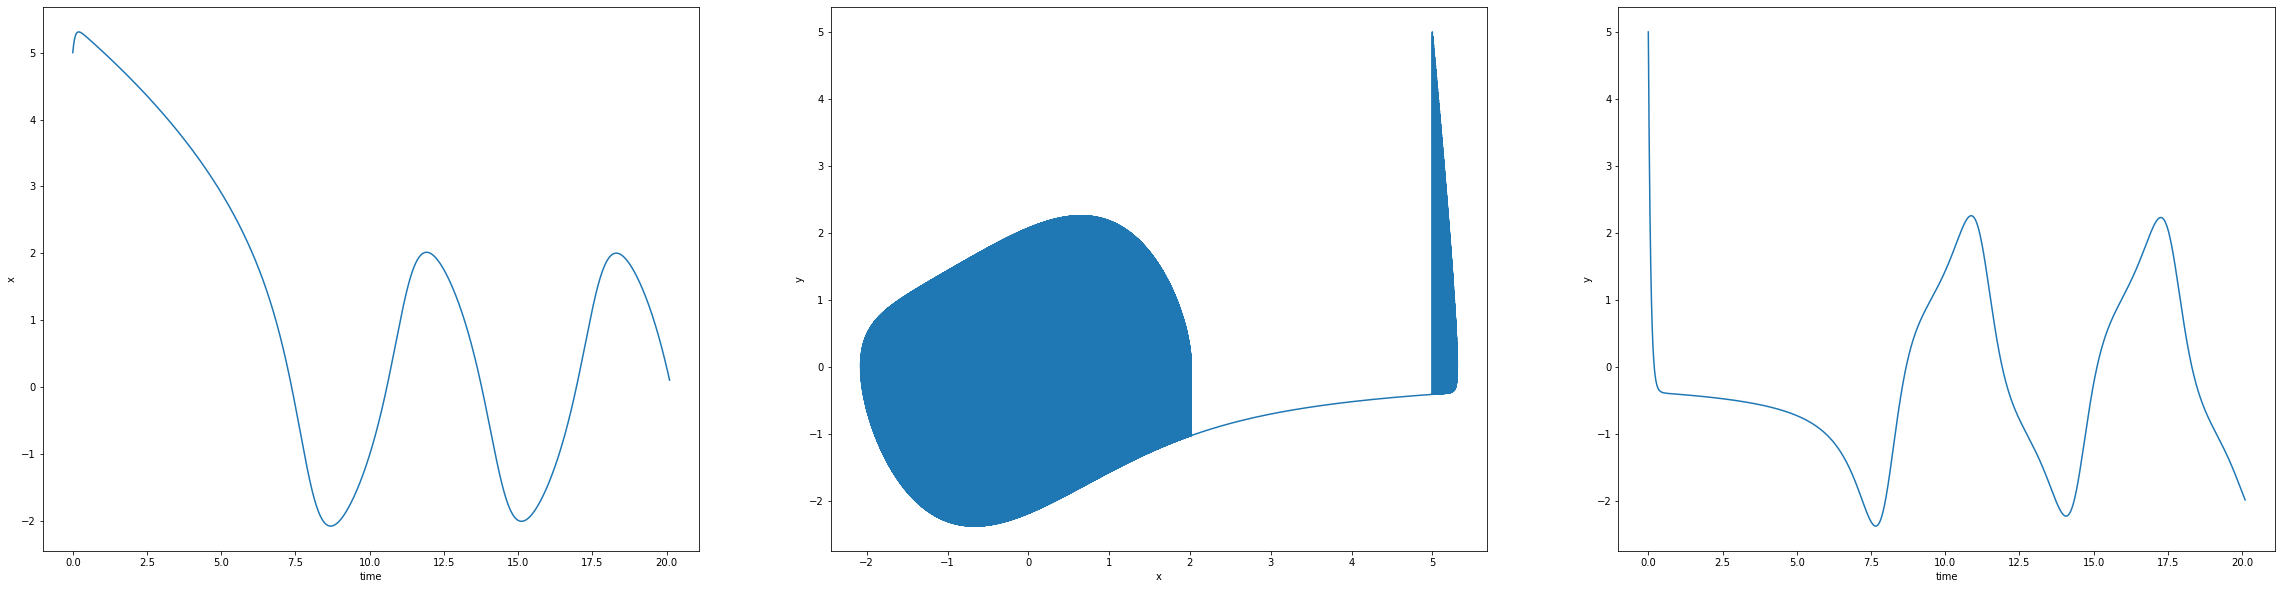

In [38]:
fig, axs = plt.subplots(ncols=3, figsize=(40,10))
sns.lineplot(data=test_df_0[0], x="x", y="y", ax=axs[1])
sns.lineplot(data=test_df_0[0], x="time", y="x", ax=axs[0])
sns.lineplot(data=test_df_0[0], x="time", y="y", ax=axs[2])

We can predict x,y with different initial times

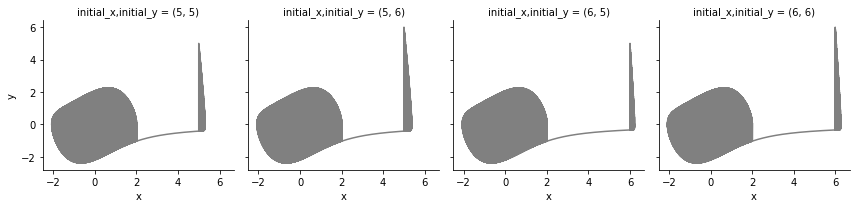

In [39]:
g = sns.FacetGrid(test_df_0_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "x", "y", color=".5", ci=None)

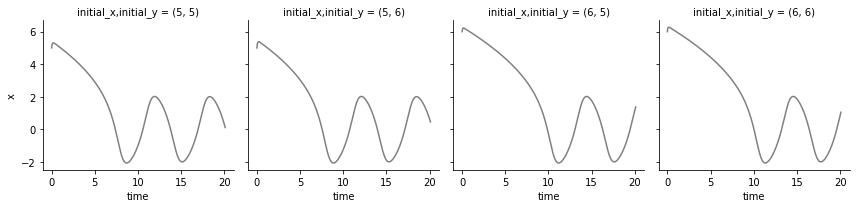

In [40]:
g = sns.FacetGrid(test_df_0_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "time", "x", color=".5", ci=None)

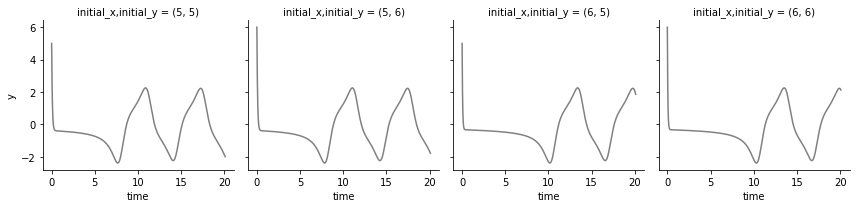

In [41]:
g = sns.FacetGrid(test_df_0_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "time", "y", color=".5", ci=None)

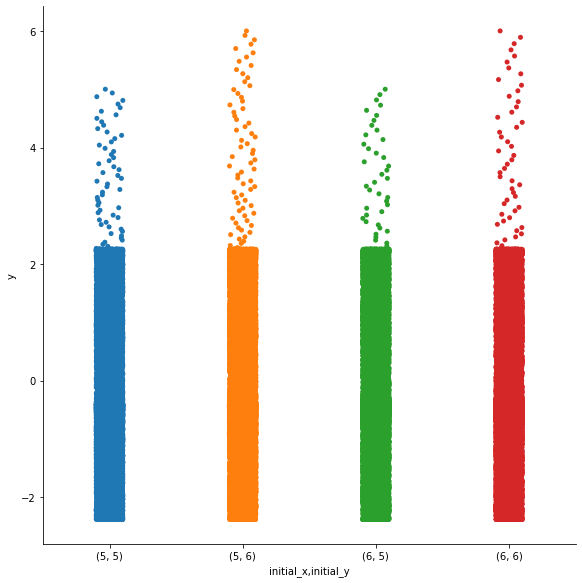

In [83]:
sns.catplot(height=8, data=test_df_0_combine, x="initial_x,initial_y", y="y")

This is the test data for testing future predictions

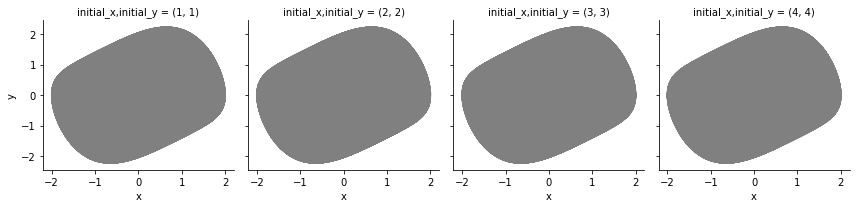

In [44]:
g = sns.FacetGrid(test_df_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "x", "y", color=".5", ci=None)

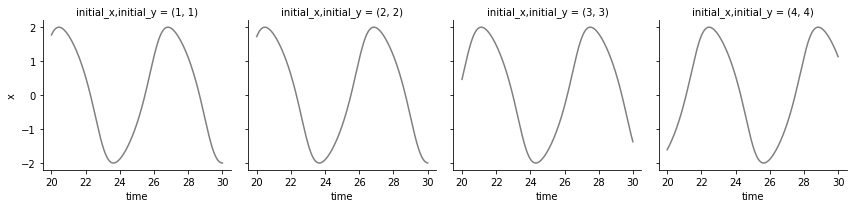

In [45]:
g = sns.FacetGrid(test_df_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "time", "x", color=".5", ci=None)

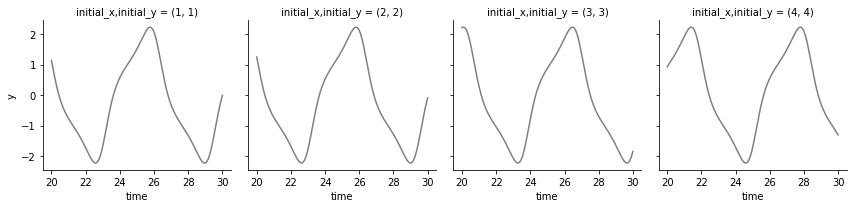

In [46]:
g = sns.FacetGrid(test_df_combine, col="initial_x,initial_y",)
g.map(sns.lineplot, "time", "y", color=".5", ci=None)

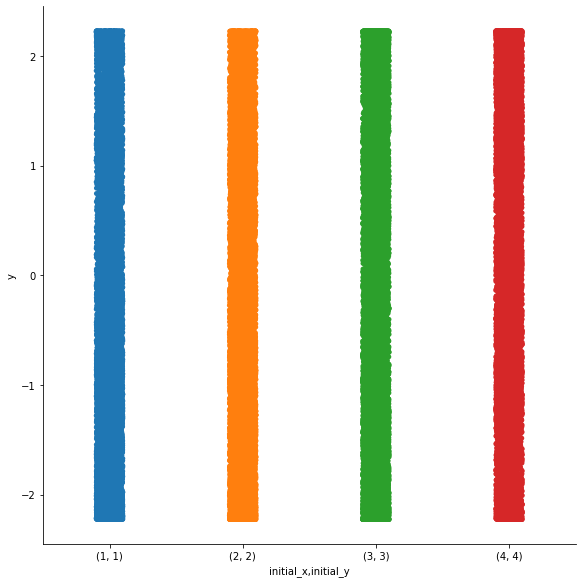

In [82]:
sns.catplot(height=8, data=test_df_combine, x="initial_x,initial_y", y="y")

Visulising the future predictions made by the neural network

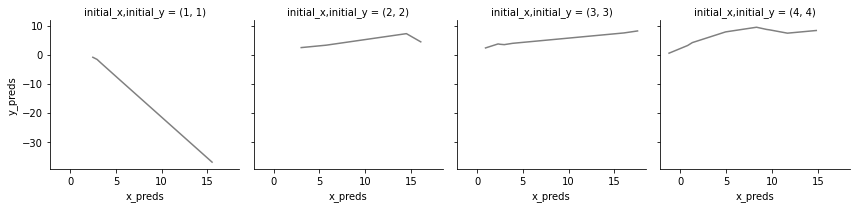

In [47]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "x_preds", "y_preds", color=".5", ci=None)

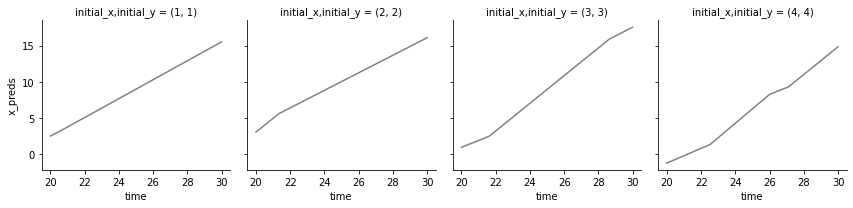

In [48]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "time", "x_preds", color=".5", ci=None)

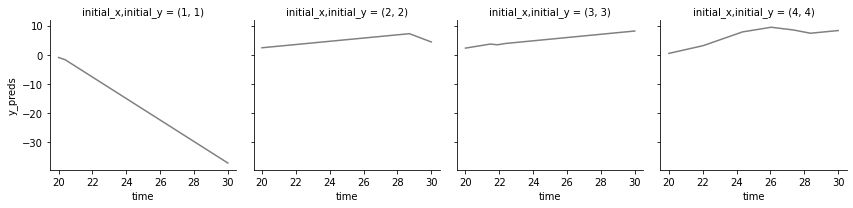

In [49]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "time", "y_preds", color=".5", ci=None)

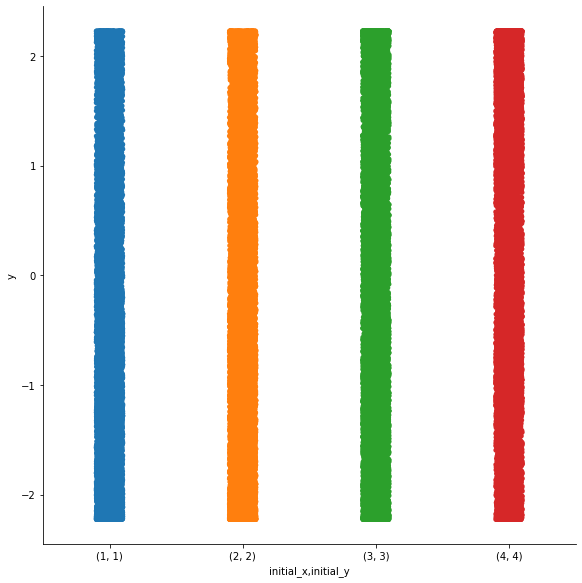

In [81]:
sns.catplot(height=8, data=preds_test_df_combine, x="initial_x,initial_y", y="y")

Visualising initial times not shown on the neural network by the training dat

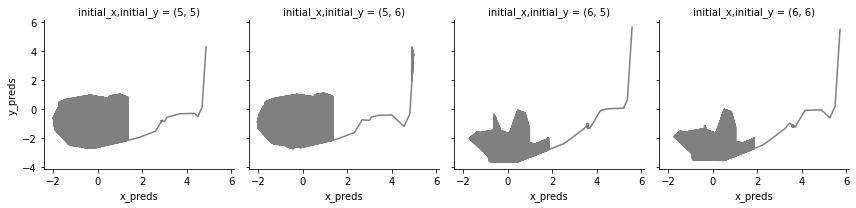

In [50]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "x_preds", "y_preds", color=".5", ci=None)

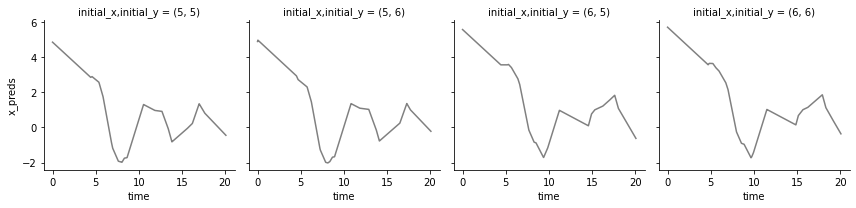

In [53]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "time", "x_preds", color=".5", ci=None)

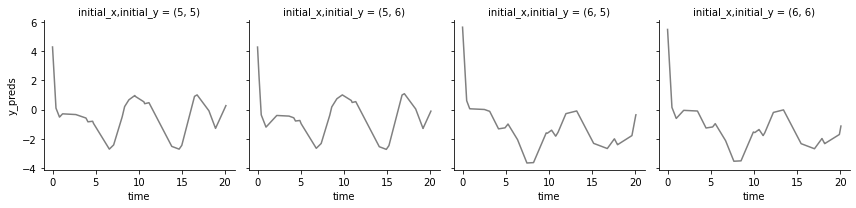

In [54]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "time", "y_preds", color=".5", ci=None)

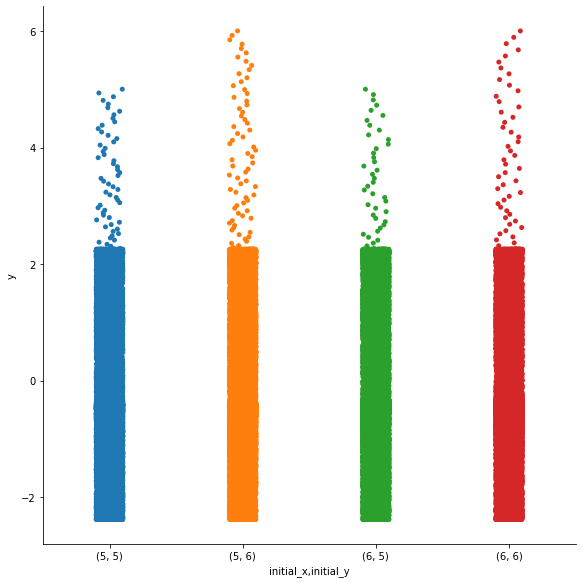

In [80]:
sns.catplot(height=8, data=preds_test_df_0_combine, x="initial_x,initial_y", y="y")

### Combining the data

This section is going to compare the predictions of the neural network with the test data

This section compares future times

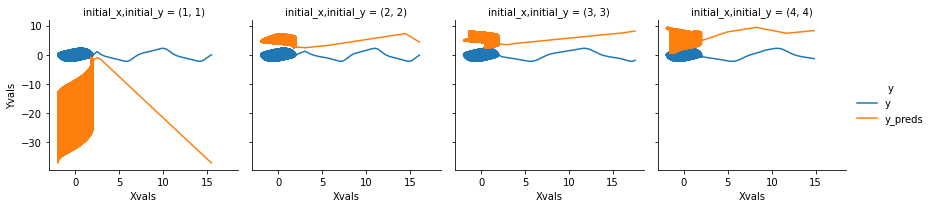

In [68]:
g = sns.FacetGrid(preds_test_df_compare, col="initial_x,initial_y", hue="y")
g.map(sns.lineplot, "Xvals", "Yvals", ci=None)
g.add_legend()

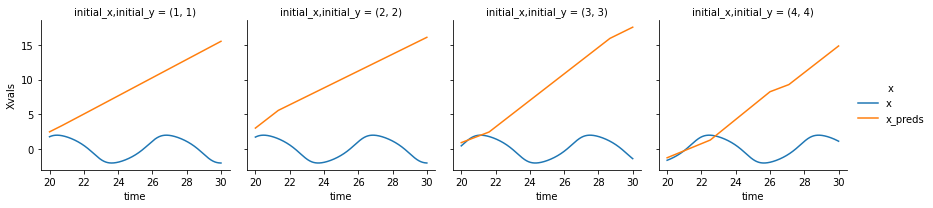

In [69]:
g = sns.FacetGrid(preds_test_df_compare, col="initial_x,initial_y", hue="x")
g.map(sns.lineplot, "time", "Xvals", ci=None)
g.add_legend()

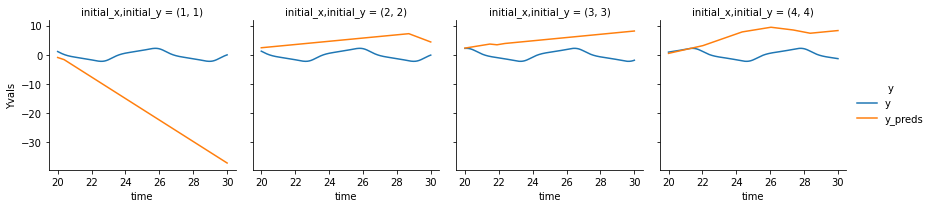

In [70]:
g = sns.FacetGrid(preds_test_df_compare, col="initial_x,initial_y", hue="y")
g.map(sns.lineplot, "time", "Yvals", ci=None)
g.add_legend()

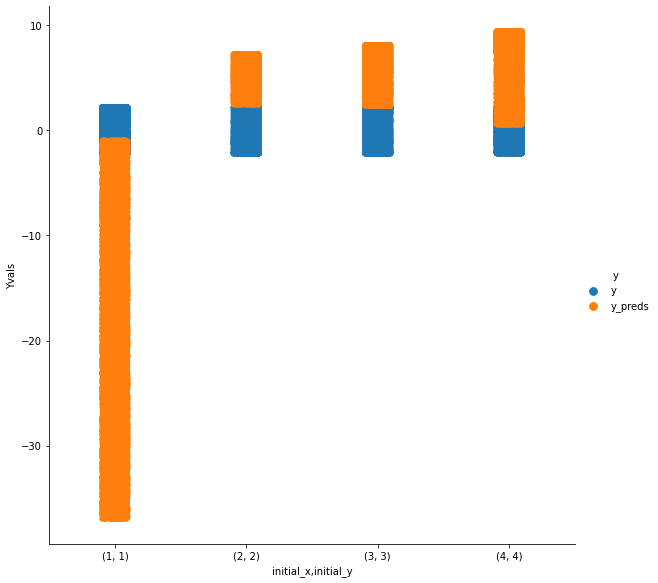

In [78]:
sns.catplot(height=8, data=preds_test_df_compare, x="initial_x,initial_y", y="Yvals", hue="y")

This sections compares the initial times predicted by the neural network

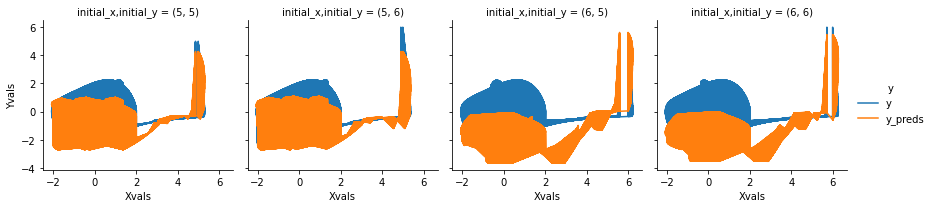

In [72]:
g = sns.FacetGrid(preds_test_df_0_compare, col="initial_x,initial_y", hue="y")
g.map(sns.lineplot, "Xvals", "Yvals", ci=None)
g.add_legend()

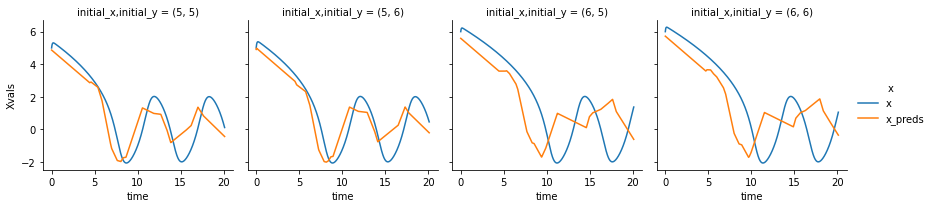

In [73]:
g = sns.FacetGrid(preds_test_df_0_compare, col="initial_x,initial_y", hue="x")
g.map(sns.lineplot, "time", "Xvals", ci=None)
g.add_legend()

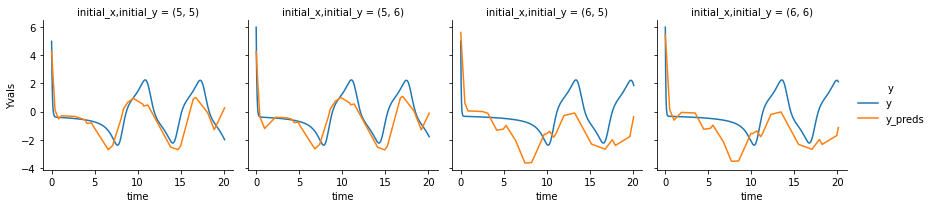

In [74]:
g = sns.FacetGrid(preds_test_df_0_compare, col="initial_x,initial_y", hue="y")
g.map(sns.lineplot, "time", "Yvals", ci=None)
g.add_legend()

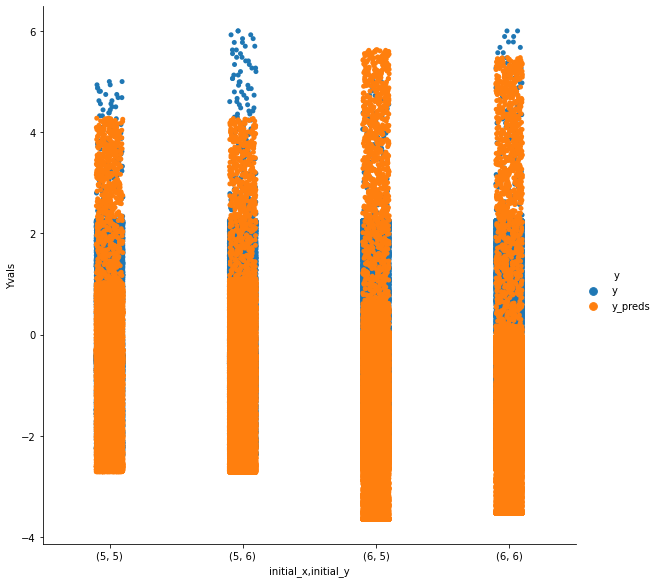

In [77]:
sns.catplot(height=8, data=preds_test_df_0_compare, x="initial_x,initial_y", y="Yvals", hue="y")